In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
sys.path.append('/home/manu/TFG_repo/scripts')  # make modules in scripts folder callable from notebooks

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from datetime import datetime, timedelta, timezone
from datetime import timezone
sys.path.append('/home/manu/TFG_repo/scripts')

In [3]:
from config import data_dir
from analysis_functions import *
plt.style.use('/home/manu/TFG_repo/notebooks/notebook.mplstyle')

In [65]:
temp, depth, date = load_time_series('test/test_1.nc')
df_ref = load_SHDR_fit('SHDR_trials/test_1_ref.csv')
df_ref_cons_08_12 = load_SHDR_fit('SHDR_trials/test_1_ref_cont_08_1.2_no_exp.csv')
df_ref_cons_07_13 = load_SHDR_fit('SHDR_trials/test_1_ref_cont_07_1.3_no_exp.csv')
df_ref_cons_08_12_exp = load_SHDR_fit('SHDR_trials/test_1_ref_cont_07_1.3_partial_exp.csv')

In [11]:
print(mean_and_std(df_ref, 'em'))
print(mean_and_std(df_ref_cons_08_12, 'em'))
print(mean_and_std(df_ref_cons_08_12_exp, 'em'))

(0.08183741506123547, 0.03200814366677624)
(0.07435957803339807, 0.0262291078256064)
(0.07554800110566108, 0.027374503864446585)
(0.07366382721588043, 0.026498695726905865)


In [66]:
print(mean_and_std(df_ref_cons_08_12_exp, 'em'))

(0.07301957125137583, 0.026154349572580553)


In [7]:
locs_1 = np.linspace(0, len(date) - 1, 20, dtype='int')

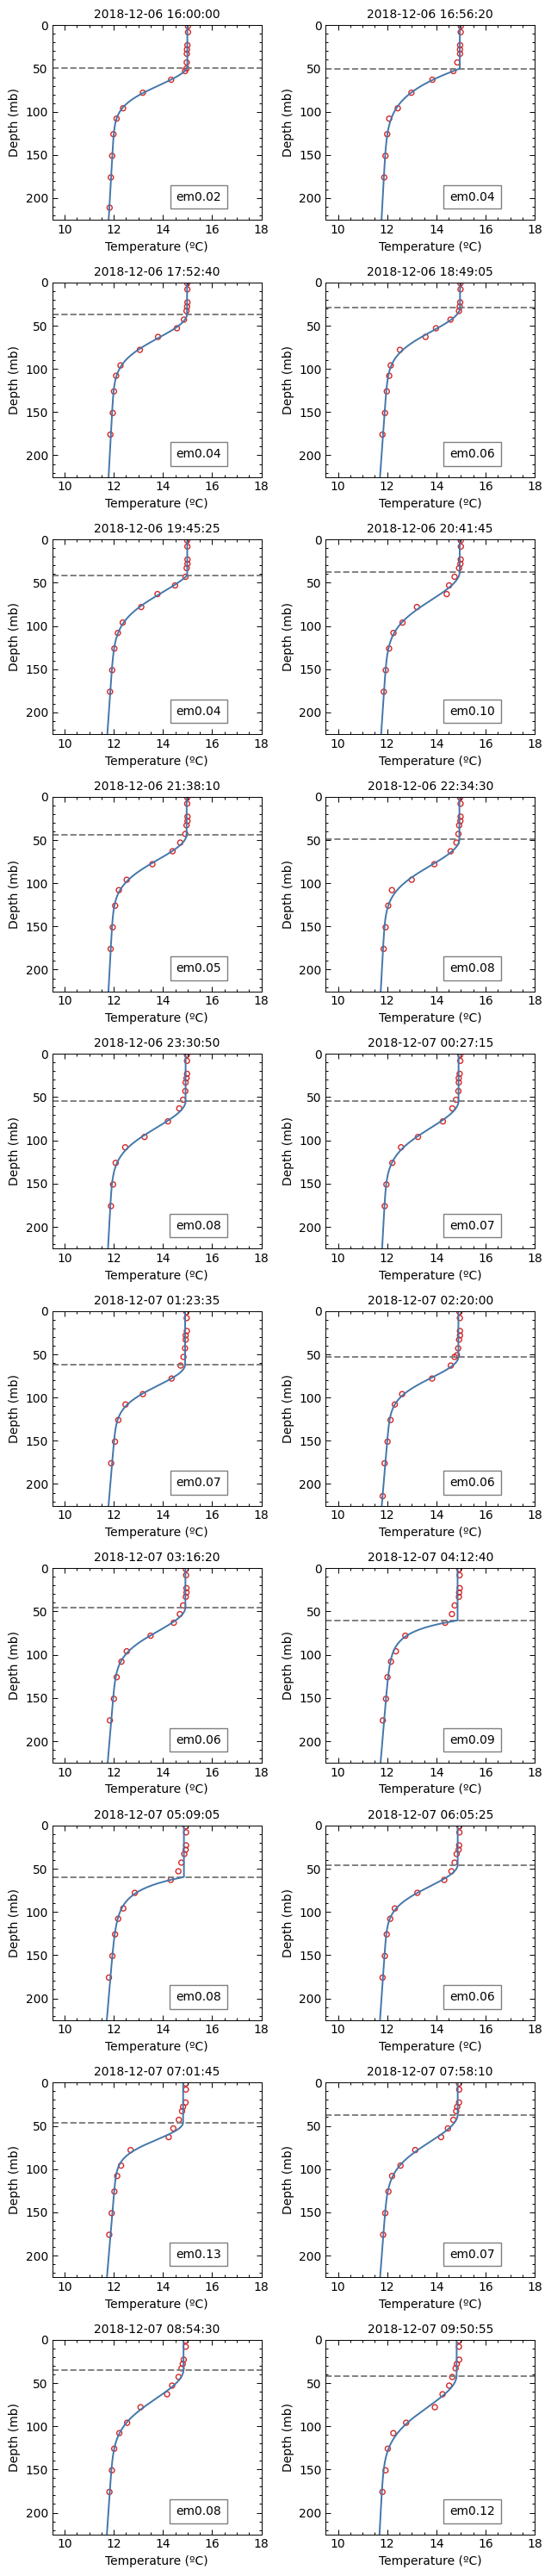

In [8]:
plot_multiple_profiles(df_ref_cons_08_12_exp, temp, depth, locs_1)

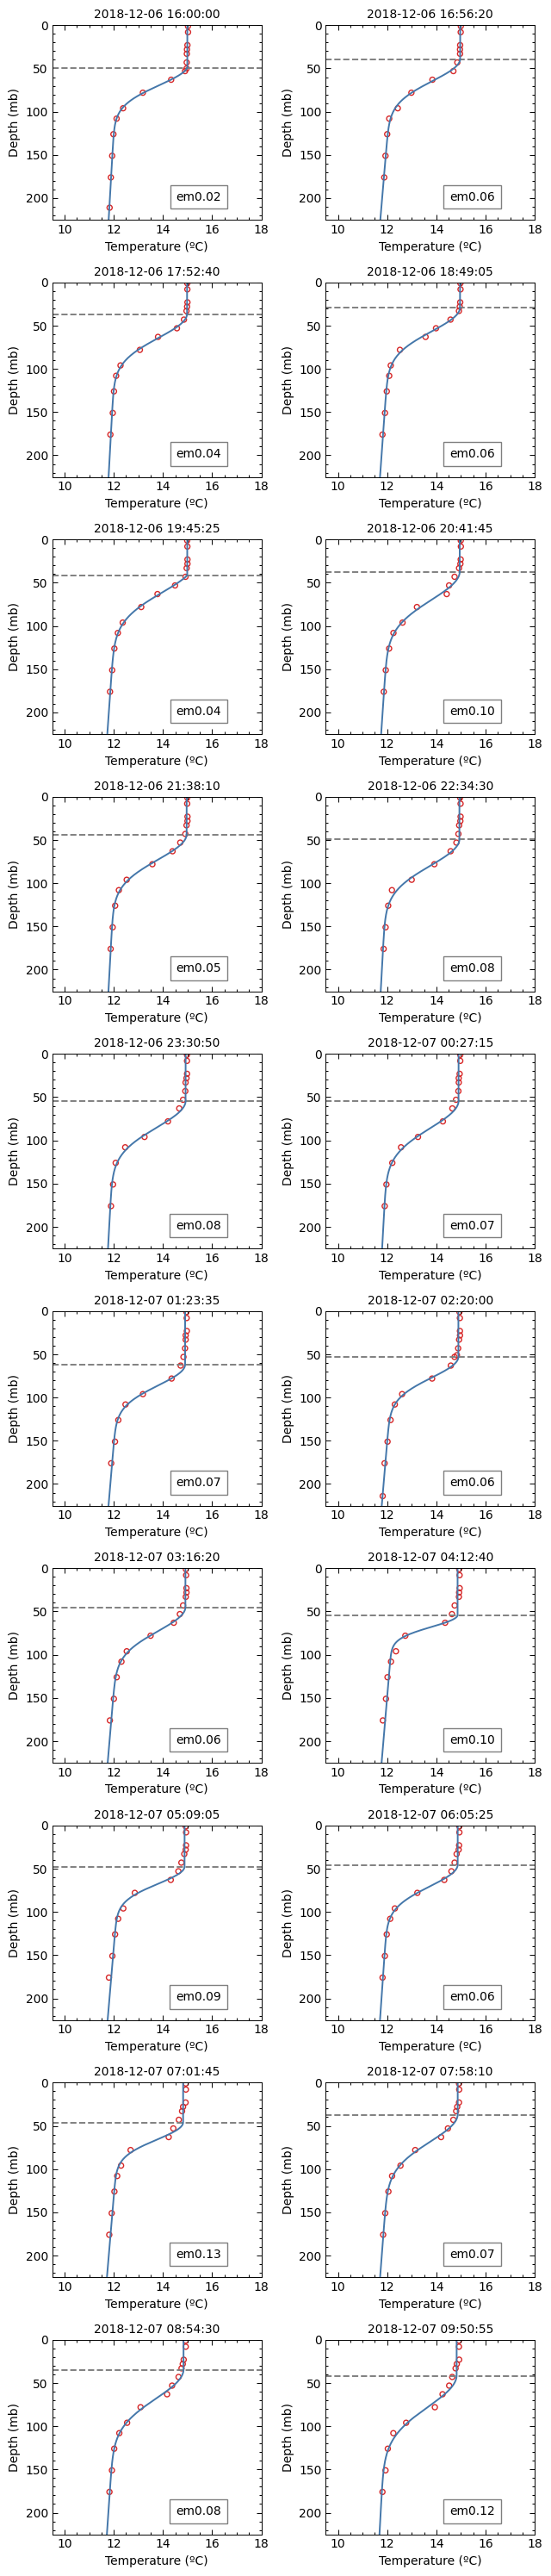

In [143]:
plot_multiple_profiles(df_ref_cons_08_12_exp, temp, depth, locs_1)

In [43]:
loc_1 = date_to_iloc(date, datetime(2018, 12, 6, 16, 56, 20))

In [28]:
def compare_fit(df_1, df_2, temp, pres, loc):
    
    temp = if_masked_to_array(temp[loc])
    pres = if_masked_to_array(pres[loc])
    zz = np.linspace(0, pres[-1] + 5, 300)    
    
    fig, ax = plt.subplots(figsize=(4, 4.6875))
    ax.scatter(temp, pres, marker='o', fc='None', ec='tab:red', s=22)
    ax.axhline(df_1.iloc[loc, 3], c='grey', ls='--', label='MLD ref') # plot MLD
    ax.axhline(df_2.iloc[loc, 3], c='grey', ls=':', label='MLD ref new tol') # plot MLD
    ax.set_ylim(pres[-1] + 10, 0)
    ax.set_xlim(9.5, 18)
    ax.plot(fit_function(zz, df_1, loc), zz, ls='--', label='ref')
    ax.plot(fit_function(zz, df_2, loc), zz, label='ref new tol')
    ax.set_xlabel('Temperature (ºC)')
    ax.set_ylabel('Depth (mb)')
    ax.set_title(df_1['Dates'].iloc[loc])
    ax.legend()
    fig.tight_layout()
    plt.show()

def distance(df_fit, variable, n, value):
    '''Given variable of df_fit, return the locs where the diference between
    slices [n:] - [:-n] in that variable are greater than value.
    '''
    array = df_fit[variable].to_numpy()
    locs = np.where(abs(array[n:] - array[:-n]) > value)[0]
    ratio = len(locs)/len(df_fit)
    return locs, ratio
                    
def n_worst_profiles(df_fit, n):
    em = df_fit['em'].to_numpy()
    indices = np.argpartition(em, -n)[-n:]
    return indices

In [67]:
locs, ratio = distance(df_ref_cons_08_12_exp, 'D1', 1, 10)
print(len(locs))

68


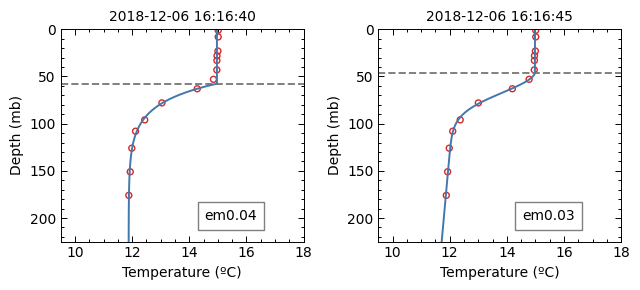

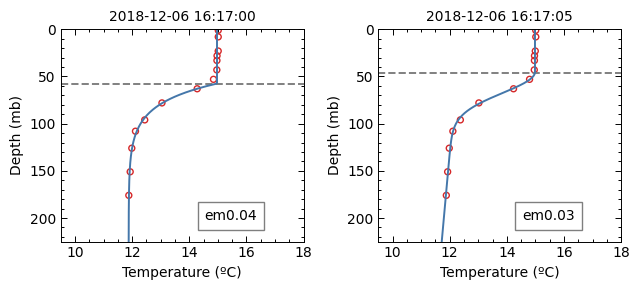

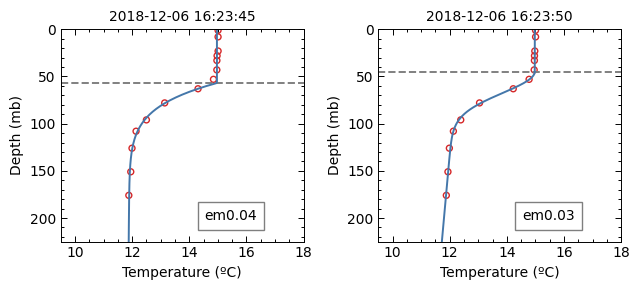

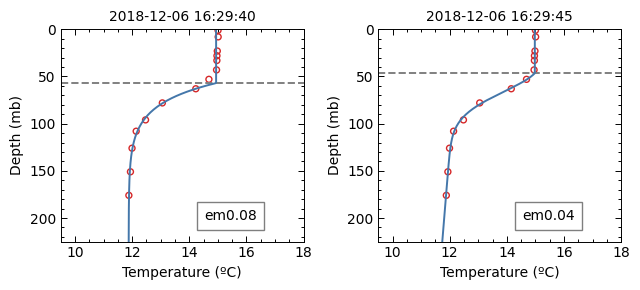

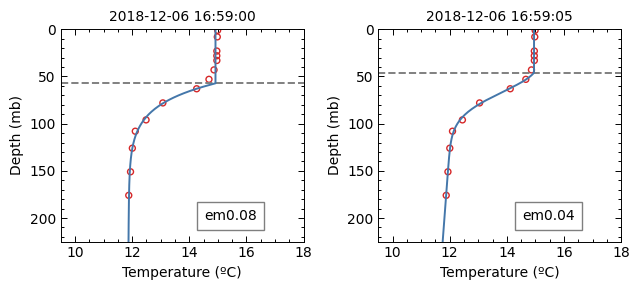

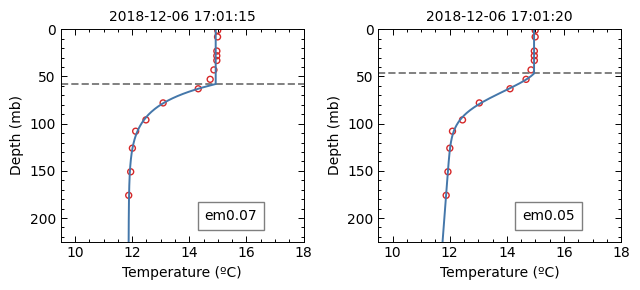

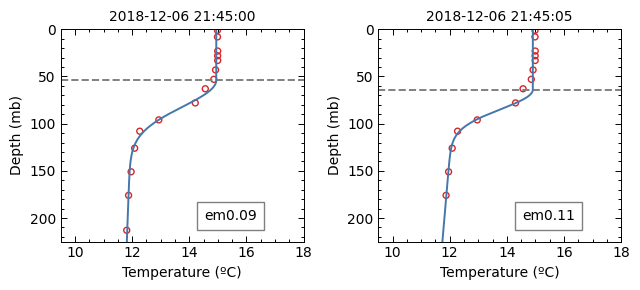

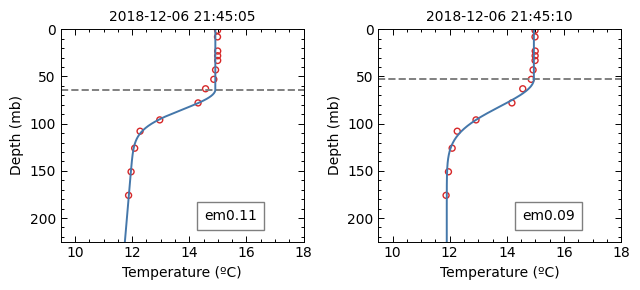

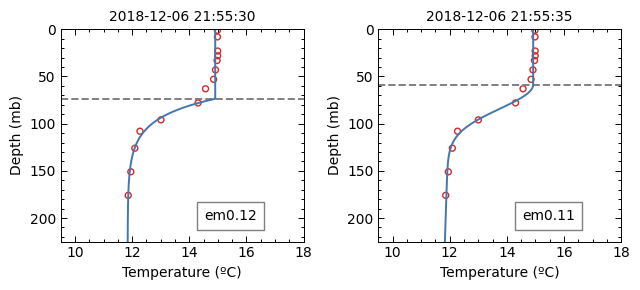

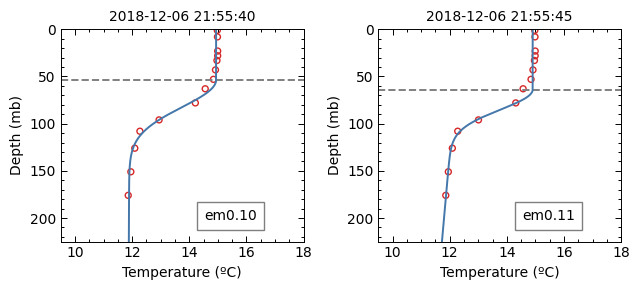

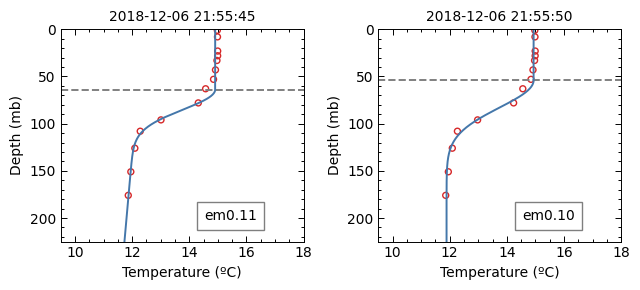

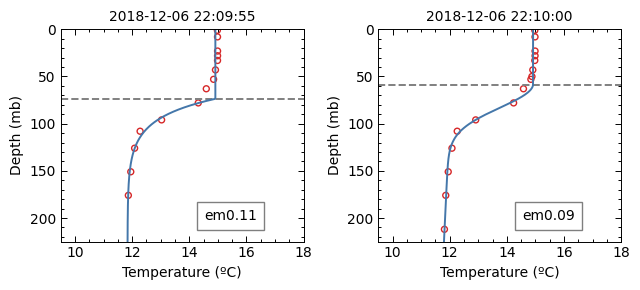

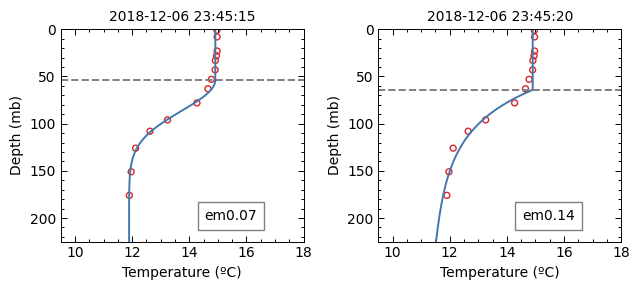

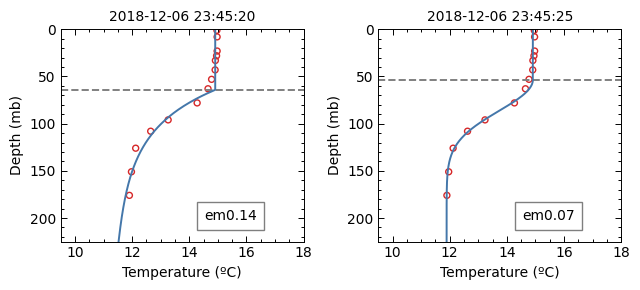

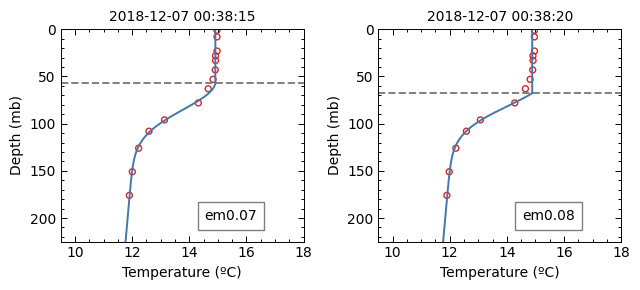

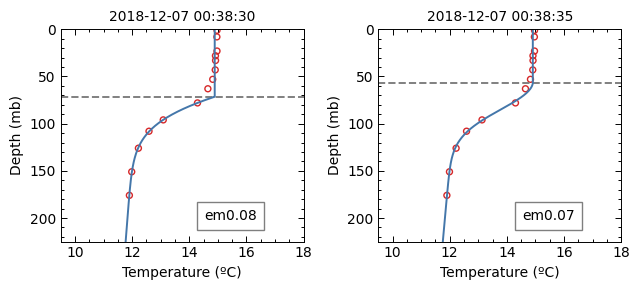

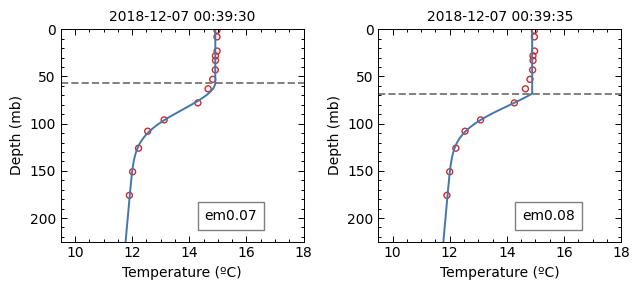

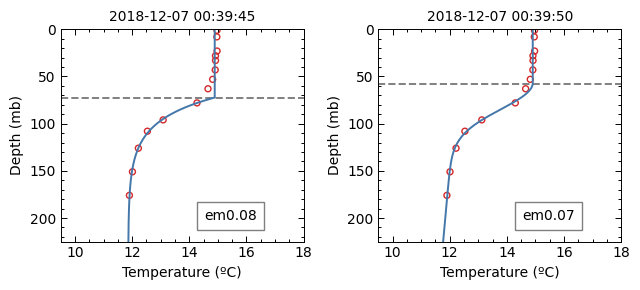

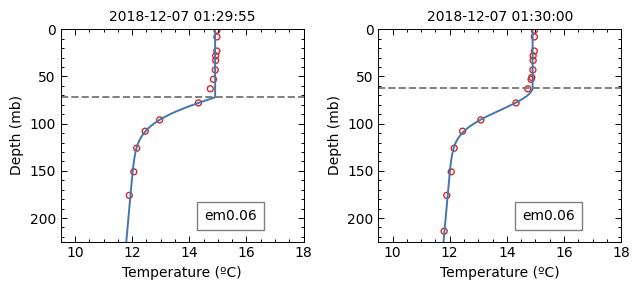

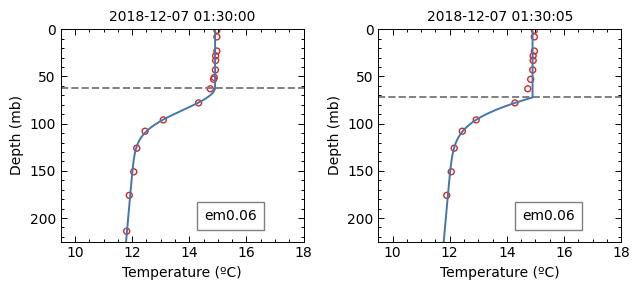

In [69]:
for i in locs[:20]:
    plot_multiple_profiles(df_ref_cons_08_12_exp, temp, depth, (i, i+1))    

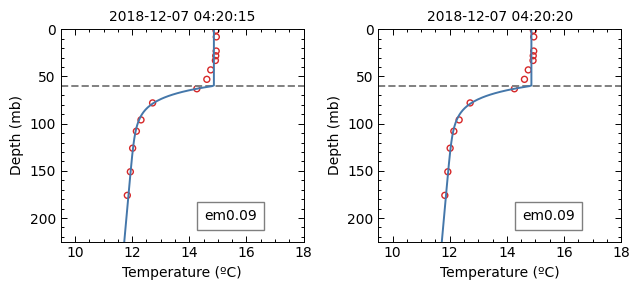

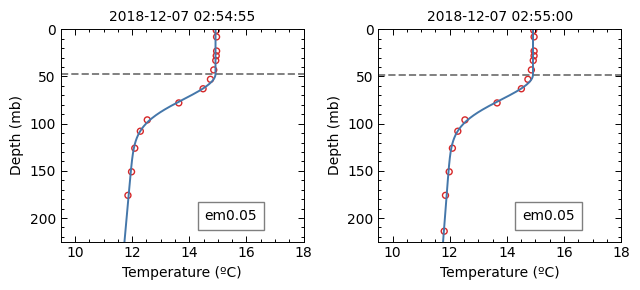

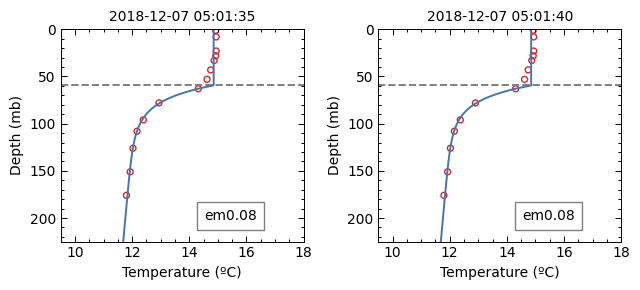

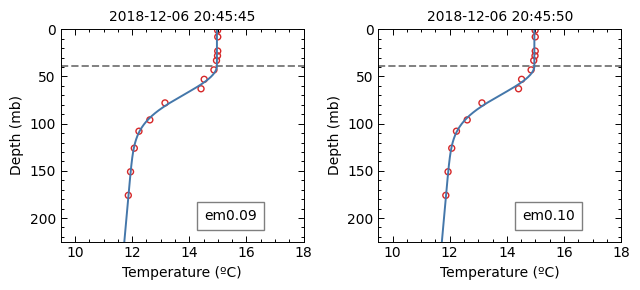

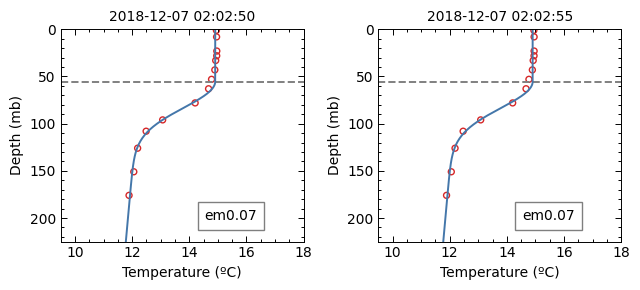

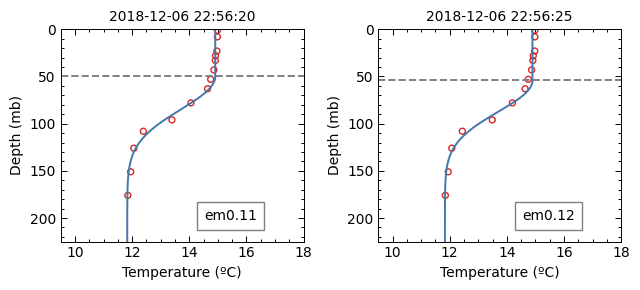

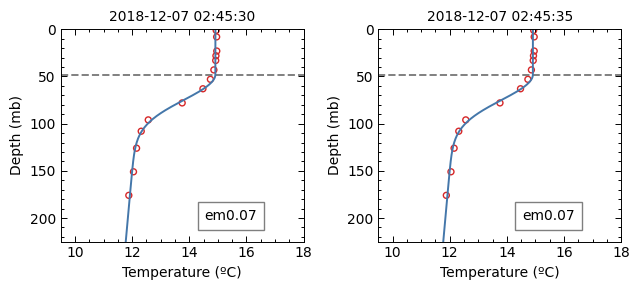

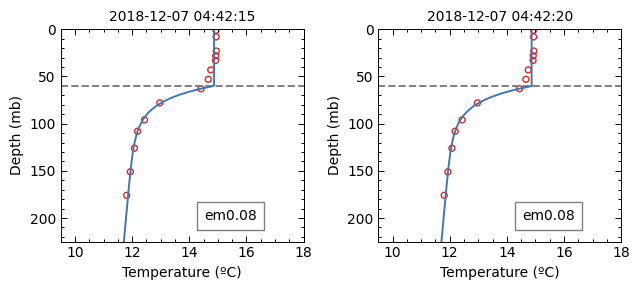

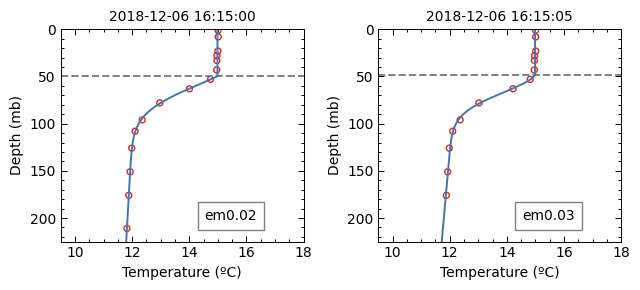

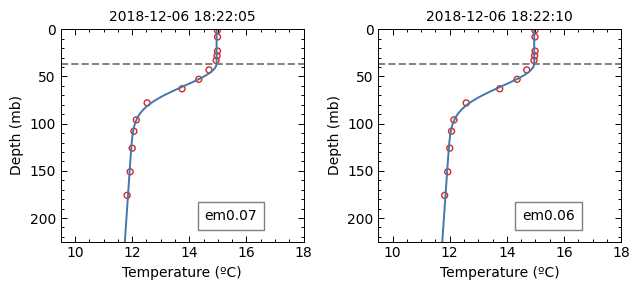

In [71]:
locs, ratio = distance(df_ref_cons_08_12_exp, 'D1', 1, 10)
for i in np.random.randint(0, high=len(date), size=10):
    plot_multiple_profiles(df_ref_cons_08_12_exp, temp, depth, (i, i+1))    

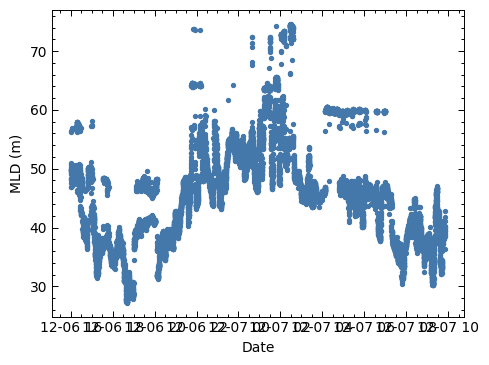

In [72]:
n = len(date) - 1
plot_fit_variable(df_ref_cons_08_12_exp, 'D1')

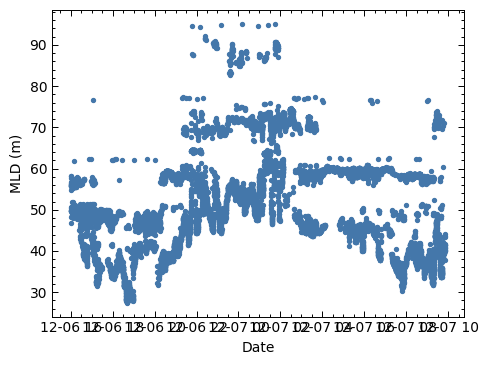

In [59]:
plot_fit_variable(df_ref, 'D1')


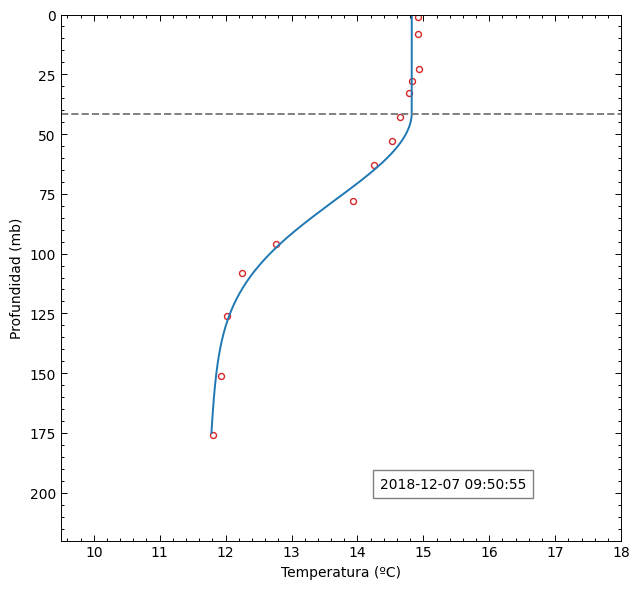

In [56]:
animate_profile_evolution(df_ref_cons_08_12_exp, temp, depth, 0, len(date)-1, 400, 'ola.mp4')
